In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

# Adjust the path to point to your project root.
project_root = os.path.abspath('/Users/treycole/Repos/axion-pert')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from modules.qe_read_file import *

In [2]:
output_folder = "andrea"
mat = "MnBi2Te4"
prefix = f"/Users/treycole/Repos/axion-pert/qe_calcs/{mat}/vdw_U/output/{output_folder}"

In [3]:
kpts, bands = read_bands_gnu(f"{prefix}/bands.dat.gnu")

In [4]:
a0 = 51.775623441
a1 = np.array([0.079085,  -0.045660,   0.995822]) * a0
a2 = np.array([0.000000,   0.091319,   0.995822]) * a0
a3 = np.array([-0.079085,  -0.045660,  0.995822]) * a0

au_to_ang = 0.529177

a0_ang = a0 * au_to_ang
a1_ang = [x * a0_ang for x in a1]
a2_ang = [x * a0_ang for x in a2]
a3_ang = [x * a0_ang for x in a3]

print(f"a0: {a0:.3f} Bohr")
print(f"a1: {a1}")
print(f"a2: {a2}")
print(f"a3: {a3}\n")

print(f"a0: {a0_ang:.3f} Angstroms")
print(f"a1: {a1_ang}")
print(f"a2: {a2_ang}")
print(f"a3: {a3_ang}")


a0: 51.776 Bohr
a1: [ 4.09467518 -2.36407497 51.55930489]
a2: [ 0.          4.72809816 51.55930489]
a3: [-4.09467518 -2.36407497 51.55930489]

a0: 27.398 Angstroms
a1: [112.1878313303424, -64.7720348807414, 1412.6460210032778]
a2: [0.0, 129.54265118866456, 1412.6460210032778]
a3: [-112.1878313303424, -64.7720348807414, 1412.6460210032778]


In [5]:
E_F = 7.6031 # eV
bands_shifted = bands - E_F

In [6]:
bands[(bands > -100)].shape[0]/251

200.0

In [7]:
bands[(bands > 0) & (bands < 11.5)].shape[0] / 251

92.84462151394422

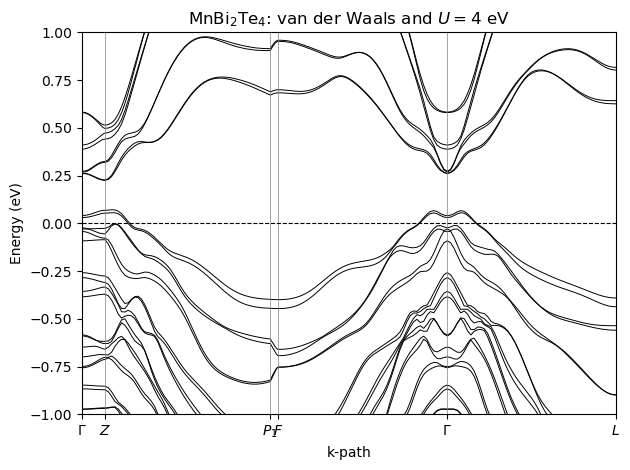

In [12]:
fig, ax = plt.subplots()

# Plot bands
for band in bands_shifted:
    ax.plot(kpts, band, color='k', lw=0.7)

# Get high-symmetry k-path labels
segments = [50, 50, 50, 50, 50, 1]  # Number of points per segment
labels = [r'$\Gamma$', r'$Z$', r'$P_1$', r'$F$', r'$\Gamma$', r'$L$']
xticks, xlabels = get_symmetry_kpath_labels(kpts, segments, labels)

# Set high-symmetry k-path labels
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
for x in xticks:
    ax.axvline(x, color='gray', lw=0.5, ls='-')

# Fermi level
ax.axhline(0, linestyle='--', color='k', lw=0.8)

# Limits
ax.set_xlim(kpts[0], kpts[-1])
# ax.set_ylim(E_F-0.1, E_F+0.1)

# ax.set_ylim(-15, 15)
ax.set_ylim(-1, 1)

# Names
ax.set_xlabel('k-path')
ax.set_ylabel('Energy (eV)')
ax.set_title(r'MnBi$_2$Te$_4$: van der Waals and $U = 4$ eV')

plt.tight_layout()
plt.show()

In [9]:
band.shape

(251,)

In [10]:
((bands > -7) & (bands < 15)).shape

(200, 251)

In [11]:
# Number of bands with energy between -7 and 15

num_bands = np.sum((band > -7) & (band[:, 0] < 15))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### Wannier windows

- Distentanglement: -7-15 eV
- Frozen: 2.5-11 eV

### Trial wavefunctions
Number of bands from -7-15 eV = 75

Number of bands from 2.5-11 eV ~ 46

- Mn1 d: 5 (l orbs) x 1 (atoms) x 2 (spins) = 10
- Mn2 d: 5 (l orbs) x 1 (atoms) x 2 (spins) = 10
- Bi p: 3 (l orbs) x 4 (atoms) x 2 (spins) = 24
- Te p: 3 (l orbs) x 8 (atoms) x 2 (spins) = 48

Total number of trial states = 92 (/2 = 46)


- Mn1 s2: 1 (l orbs) x 1 (atoms) x 2 (spins) = 2
- Mn2 s2: 1 (l orbs) x 1 (atoms) x 2 (spins) = 2
- Bi s: 1 (l orbs) x 4 (atoms) x 2 (spins) = 8
- Te s: 1 (l orbs) x 8 (atoms) x 2 (spins) = 16


In [ ]:
92/2

46.0

In [ ]:
10 + 10 + 24 + 48 #+ 2+2+8+16

92